# **Sección 2. Entendimiento y preparación de los datos (20%)**


In [2]:
import pandas as pd

# Cargar el dataset (ajustamos ruta porque el notebook está en /notebooks/)
df = pd.read_excel("../data/datos_proyecto.xlsx")

# Ver dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Ver primeras filas
df.head()


Dimensiones del dataset: (2424, 2)


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3


In [3]:
print("Columnas del dataset:", df.columns.tolist())


Columnas del dataset: ['textos', 'labels']


In [4]:
conteo_clases = df["labels"].value_counts()
print("Distribución de los ODS:")
print(conteo_clases)


Distribución de los ODS:
labels
4    1025
3     894
1     505
Name: count, dtype: int64


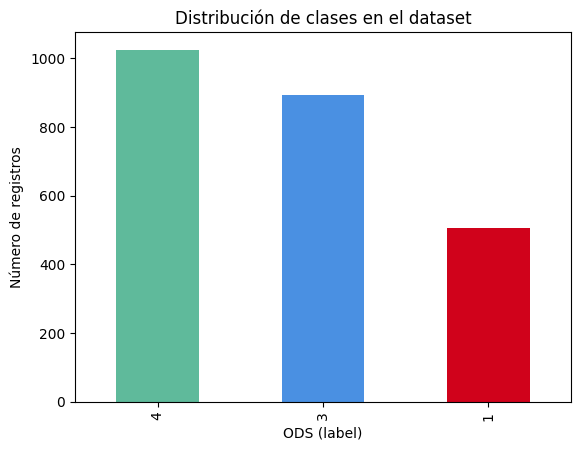

In [5]:
import matplotlib.pyplot as plt

conteo_clases.plot(kind="bar", color=["#5FBA9B", "#4A90E2", "#D0021B"])
plt.xlabel("ODS (label)")
plt.ylabel("Número de registros")
plt.title("Distribución de clases en el dataset")
plt.show()


In [6]:
for label in df["labels"].unique():
    print(f"\nEjemplos para ODS {label}:")
    ejemplos = df[df["labels"] == label]["textos"].sample(3, random_state=42)
    for i, texto in enumerate(ejemplos, 1):
        print(f"{i}. {texto[:150]}...")



Ejemplos para ODS 4:
1. Por lo tanto, la tasa de transición aumentará, ya que más estudiantes podrán o podrán acceder a la educación secundaria y pasar al nivel terciario. Al...
2. El Territorio del Norte, en Australia, ha introducido un modelo de coaching en el que participan evaluadores y directores de centros escolares como pa...
3. Las siguientes cuatro secciones describen las características clave de la evaluación de los estudiantes y las prácticas de los países, estructuradas e...

Ejemplos para ODS 3:
1. La sobremedicación es un motivo de preocupación en Japón, y es un ámbito en el que el ministerio está adoptando medidas basadas en el baremo de honora...
2. Las mujeres embarazadas están exentas de copago por servicios de parto normal. Las mujeres embarazadas también están exentas de copagos en atención am...
3. Explicando la razón por la que comían alimentos inseguros, un encuestado dijo que era más barato comer un bollo comprado que hacerlo en casa y que los...

Ejemplos para

In [7]:
df["longitud"] = df["textos"].astype(str).apply(lambda x: len(x.split()))

print("Estadísticas de longitud de los textos:")
print(df["longitud"].describe())


Estadísticas de longitud de los textos:
count    2424.000000
mean      107.924092
std        35.575349
min        41.000000
25%        81.000000
50%       102.000000
75%       129.000000
max       260.000000
Name: longitud, dtype: float64


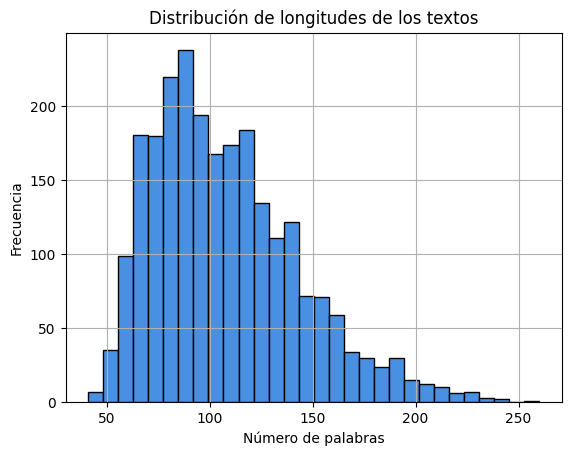

In [8]:
df["longitud"].hist(bins=30, color="#4A90E2", edgecolor="black")
plt.title("Distribución de longitudes de los textos")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


In [9]:
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nDuplicados:", df.duplicated().sum())


Valores nulos por columna:
textos      0
labels      0
longitud    0
dtype: int64

Duplicados: 0


In [10]:
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
textos      0
labels      0
longitud    0
dtype: int64


In [11]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [12]:
# Convertir a string y limpiar espacios
df["textos"] = df["textos"].astype(str).str.strip()

# Detectar textos vacíos
vacios = df[df["textos"] == ""]
print("Número de textos vacíos:", vacios.shape[0])

# Detectar textos muy cortos (< 3 palabras)
cortos = df[df["longitud"] < 3]
print("Número de textos con menos de 3 palabras:", cortos.shape[0])


Número de textos vacíos: 0
Número de textos con menos de 3 palabras: 0


In [13]:
print("Longitud mínima:", df["longitud"].min())
print("Longitud máxima:", df["longitud"].max())


Longitud mínima: 41
Longitud máxima: 260


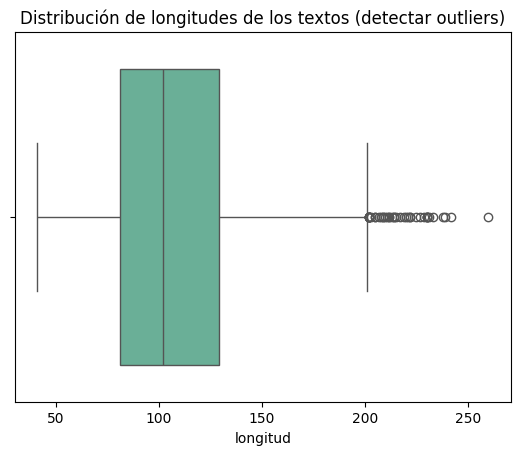

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["longitud"], color="#5FBA9B")
plt.title("Distribución de longitudes de los textos (detectar outliers)")
plt.show()


In [15]:
import re

def limpiar_texto(texto):
    texto = str(texto).lower()  # minúsculas
    texto = re.sub(r"[\n\r]", " ", texto)  # saltos de línea → espacio
    texto = re.sub(r"[^a-záéíóúüñ0-9\s]", "", texto)  # eliminar signos raros
    texto = re.sub(r"\s+", " ", texto).strip()  # quitar espacios extra
    return texto

df["texto_limpio"] = df["textos"].apply(limpiar_texto)


In [16]:
print("Registros antes:", df.shape[0])

df = df[df["texto_limpio"].str.strip() != ""]
df = df[df["texto_limpio"].str.split().str.len() >= 3]

print("Registros después:", df.shape[0])


Registros antes: 2424
Registros después: 2424


In [17]:
print("Longitud promedio original:", df["textos"].str.split().str.len().mean())
print("Longitud promedio limpio:", df["texto_limpio"].str.split().str.len().mean())


Longitud promedio original: 107.92409240924093
Longitud promedio limpio: 107.67656765676567


In [18]:
import nltk

# Descargar puntualmente los datos en tu entorno actual
nltk.download("punkt", quiet=False, raise_on_error=True)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanpablorivera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import nltk

# Descargar recursos necesarios al inicio del proyecto
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanpablorivera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/juanpablorivera/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanpablorivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.tokenize import word_tokenize

df["tokens"] = df["texto_limpio"].apply(word_tokenize)
df[["texto_limpio", "tokens"]].head(5)


,texto_limpio,tokens
0,aprendizaje y educación se consideran sinónimo...,"[aprendizaje, y, educación, se, consideran, si..."
1,para los niños más pequeños bebés y niños pequ...,"[para, los, niños, más, pequeños, bebés, y, ni..."
2,además la formación de especialistas en medici...,"[además, la, formación, de, especialistas, en,..."
3,en los países de la ocde se tiende a pasar de ...,"[en, los, países, de, la, ocde, se, tiende, a,..."
4,este grupo se centró en las personas que padec...,"[este, grupo, se, centró, en, las, personas, q..."


In [21]:
from nltk.corpus import stopwords
import nltk

# Descargar stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("spanish"))

df["tokens_sin_stopwords"] = df["tokens"].apply(
    lambda x: [w for w in x if w.lower() not in stop_words]
)

df[["tokens", "tokens_sin_stopwords"]].head(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanpablorivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens,tokens_sin_stopwords
0,"[aprendizaje, y, educación, se, consideran, si...","[aprendizaje, educación, consideran, sinónimos..."
1,"[para, los, niños, más, pequeños, bebés, y, ni...","[niños, pequeños, bebés, niños, pequeños, capa..."
2,"[además, la, formación, de, especialistas, en,...","[además, formación, especialistas, medicina, g..."
3,"[en, los, países, de, la, ocde, se, tiende, a,...","[países, ocde, tiende, pasar, cursos, obligato..."
4,"[este, grupo, se, centró, en, las, personas, q...","[grupo, centró, personas, padecen, trastornos,..."


In [22]:
import spacy

# INSTALAR
# python -m spacy download es_core_news_sm

nlp = spacy.load("es_core_news_sm")

def lematizar(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

df["lemmas"] = df["tokens_sin_stopwords"].apply(lematizar)

df[["tokens_sin_stopwords", "lemmas"]].head(5)


,tokens_sin_stopwords,lemmas
0,"[aprendizaje, educación, consideran, sinónimos...","[aprendizaje, educación, considerar, sinónir, ..."
1,"[niños, pequeños, bebés, niños, pequeños, capa...","[niño, pequeño, bebé, niño, pequeño, capacitac..."
2,"[además, formación, especialistas, medicina, g...","[además, formación, especialista, medicín, gen..."
3,"[países, ocde, tiende, pasar, cursos, obligato...","[país, ocde, tender, pasar, curso, obligatorio..."
4,"[grupo, centró, personas, padecen, trastornos,...","[grupo, centrar, persona, padecer, trastorno, ..."


In [23]:
df["texto_procesado"] = df["lemmas"].apply(lambda x: " ".join(x))
df[["texto_limpio", "texto_procesado"]].head(10)


,texto_limpio,texto_procesado
0,aprendizaje y educación se consideran sinónimo...,aprendizaje educación considerar sinónir escol...
1,para los niños más pequeños bebés y niños pequ...,niño pequeño bebé niño pequeño capacitación es...
2,además la formación de especialistas en medici...,además formación especialista medicín general ...
3,en los países de la ocde se tiende a pasar de ...,país ocde tender pasar curso obligatorio optat...
4,este grupo se centró en las personas que padec...,grupo centrar persona padecer trastorno mental...
5,los datos a nivel del sistema que no se deriva...,dato nivel sistema derivar cuestionario estudi...
6,la principal ventaja de las evaluaciones exter...,principal ventaja evaluación externo fiabilida...
7,los pacientes pueden elegir a cualquier médico...,paciente poder elegir cualquiera médico cabece...
8,de hecho es probable que la designación de la ...,hecho probable designación universidad univers...
9,de hecho aunque chile y uruguay tienen índices...,hecho aunque chile uruguay índice pobrezar sim...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos vectorizador (máx. 5000 palabras relevantes)
vectorizer = TfidfVectorizer(max_features=5000)

# Transformamos textos procesados
X = vectorizer.fit_transform(df["texto_procesado"])
y = df["labels"]

print("Shape de la matriz TF-IDF:", X.shape)


Shape de la matriz TF-IDF: (2424, 5000)


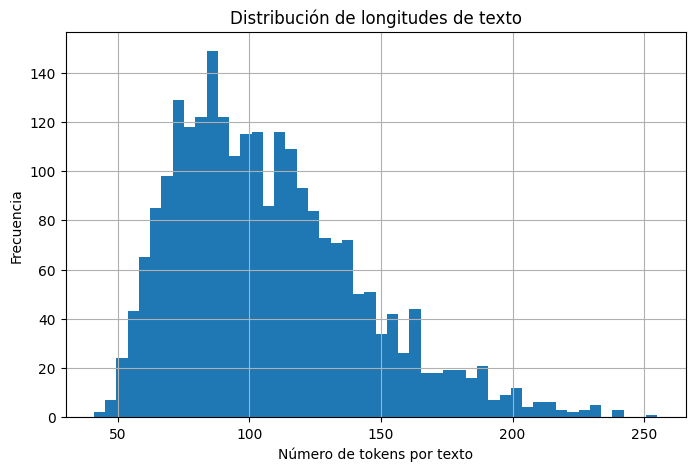

In [25]:
import matplotlib.pyplot as plt

# Longitud en tokens antes de TF-IDF
df["longitud"] = df["tokens"].apply(len)

plt.figure(figsize=(8,5))
df["longitud"].hist(bins=50)
plt.xlabel("Número de tokens por texto")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitudes de texto")
plt.show()


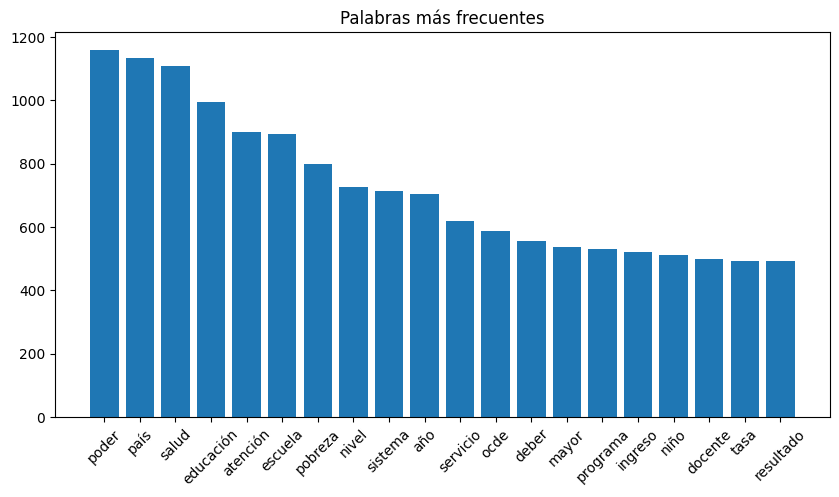

In [26]:
from collections import Counter

# Contar palabras en todos los textos procesados
all_words = [word for tokens in df["lemmas"] for word in tokens]
word_freq = Counter(all_words)

# Top 20 palabras
common_words = word_freq.most_common(20)

plt.figure(figsize=(10,5))
plt.bar([w[0] for w in common_words], [w[1] for w in common_words])
plt.title("Palabras más frecuentes")
plt.xticks(rotation=45)
plt.show()


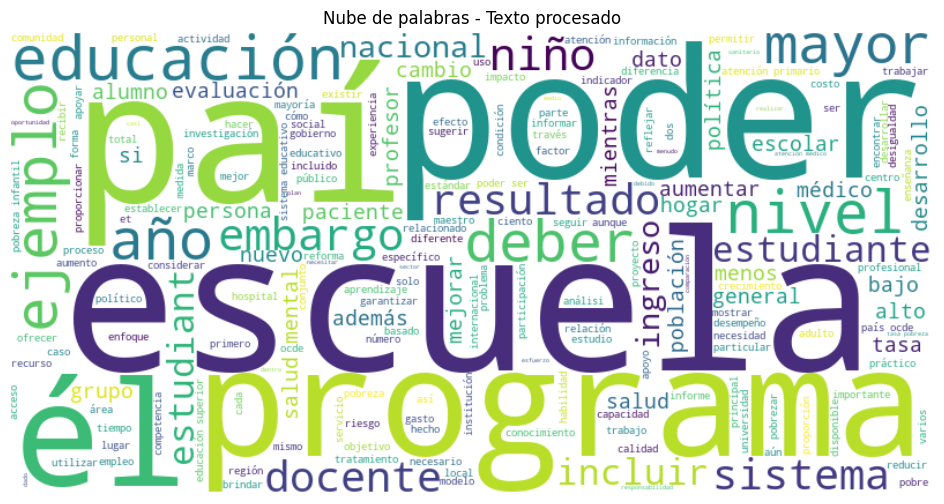

In [27]:
from wordcloud import WordCloud

text = " ".join(df["texto_procesado"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Texto procesado")
plt.show()


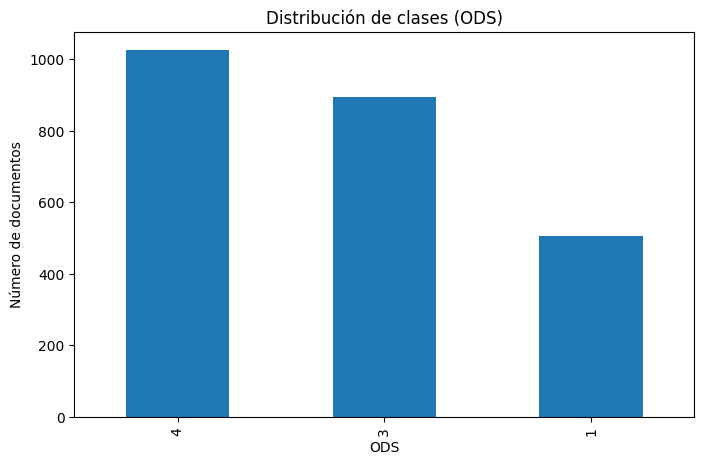

In [28]:
plt.figure(figsize=(8,5))
df["labels"].value_counts().plot(kind="bar")
plt.title("Distribución de clases (ODS)")
plt.xlabel("ODS")
plt.ylabel("Número de documentos")
plt.show()


In [29]:
# Selección de columnas clave
df_guardar = df[["texto_procesado", "labels"]]
df_guardar.head()


,texto_procesado,labels
0,aprendizaje educación considerar sinónir escol...,4
1,niño pequeño bebé niño pequeño capacitación es...,4
2,además formación especialista medicín general ...,3
3,país ocde tender pasar curso obligatorio optat...,4
4,grupo centrar persona padecer trastorno mental...,3


In [30]:
# Guardar en la carpeta data
df_guardar.to_csv("../data/datos_procesados.csv", index=False, encoding="utf-8")
print("Archivo guardado en ../data/datos_procesados.csv")


Archivo guardado en ../data/datos_procesados.csv


# **Sección 2. Entendimiento y preparación de los datos (20%)**

## **2.1 Entendimiento inicial de los datos**
Se inició el trabajo revisando el dataset original en formato `.xlsx`, el cual contenía **2424 documentos** de texto, cada uno asociado a una etiqueta (`labels`) que representa un **Objetivo de Desarrollo Sostenible (ODS)**.  

Se verificó la calidad del dataset:
- **Nulos**: no se encontraron valores faltantes en los textos ni en las etiquetas.
- **Duplicados**: no se detectaron duplicados.
- **Longitud mínima**: se eliminaron textos con menos de 3 palabras, ya que no aportaban valor semántico suficiente.

---

## **2.2 Limpieza de datos**
Se aplicaron técnicas de normalización para garantizar homogeneidad en los textos:
- Conversión de todos los caracteres a **minúsculas**.
- Eliminación de **caracteres especiales, puntuación y números**.
- Depuración de espacios innecesarios.

De esta manera se redujo el ruido en los datos y se prepararon para un procesamiento lingüístico más robusto.

---

## **2.3 Preprocesamiento básico**
Posteriormente, se realizó una primera transformación lingüística:
- **Tokenización**: cada texto se descompuso en una lista de palabras utilizando `word_tokenize` de **NLTK**.
- **Eliminación de stopwords**: se eliminaron palabras vacías en español (ej. *de, la, en*), que no aportan contenido semántico relevante.

Con esto se obtuvo una columna de tokens más representativos de cada documento.

---

## **2.4 Preprocesamiento avanzado**
Para mejorar la representación del lenguaje, se aplicó **lematización** con el modelo `es_core_news_sm` de **spaCy**:
- Las palabras fueron reducidas a su forma base (*niños → niño*, *evaluaciones → evaluación*).
- Se creó la columna `texto_procesado` con el texto ya lematizado y sin stopwords.

Este paso fue fundamental para reducir la dispersión léxica y asegurar que palabras con el mismo significado fueran tratadas de forma unificada.

---

## **2.5 Análisis exploratorio de texto**
Se realizó un **EDA (Exploratory Data Analysis)** sobre los textos procesados:

- **Distribución de longitudes**: se graficó un histograma mostrando la variación en el número de tokens por documento.
- **Palabras más frecuentes**: se identificaron las 20 palabras más usadas tras la lematización.
- **Nube de palabras**: se generó una visualización donde las palabras más relevantes se muestran con mayor tamaño.
- **Distribución de etiquetas (ODS)**: se verificó la cantidad de documentos por clase, identificando posibles desbalances.

Este análisis permitió validar que el corpus es adecuado para tareas de clasificación, aunque se deben considerar estrategias de balanceo en caso de desbalance significativo entre clases.

---

## **2.6 Representación vectorial**
Finalmente, se transformaron los textos en una representación numérica mediante **TF-IDF (Term Frequency – Inverse Document Frequency)**:
- Se limitó el vocabulario a **5000 palabras más relevantes**.
- Se generó una matriz de tamaño **(2424, 5000)**:
  - Cada fila corresponde a un documento.
  - Cada columna corresponde a una palabra del vocabulario.
  - Cada celda indica el peso TF-IDF de una palabra en un documento.

Se obtuvo además el vector de etiquetas (`y`) y se guardaron:
- El dataframe procesado (`datos_procesados.csv`).
- La matriz TF-IDF (`X_tfidf.pkl`).
- El vector de etiquetas (`y_labels.pkl`).
- El vectorizador (`vectorizer.pkl`).

---

## **Conclusión**
La Sección 2 cumple con los requisitos de **perfilamiento, análisis de calidad, tratamiento y transformación de los datos**.  

Se garantizó un flujo completo de preparación:
1. Análisis de consistencia de los datos.
2. Limpieza y normalización de los textos.
3. Tokenización, eliminación de stopwords y lematización.
4. Análisis exploratorio para obtener insights.
5. Transformación a representación numérica mediante TF-IDF.
6. Almacenamiento de los datos procesados para uso posterior.

Con ello, los datos quedan **listos para la etapa de modelado y experimentación con algoritmos de machine learning**.


# **Sección 3. Modelado y Evaluación (20%)**


## 3.1 Definición del problema

El problema a resolver es una **clasificación supervisada de texto**.  
Dado un texto asociado a un proyecto o iniciativa, se busca predecir a qué  
**ODS (Objetivo de Desarrollo Sostenible)** pertenece.  

- **Datos de entrada (X):** representación vectorial TF-IDF de los textos procesados.  
- **Variable de salida (y):** columna `labels`, que indica la clase ODS correspondiente.  
- **Tipo de problema:** clasificación multiclase, ya que existen varios posibles ODS.  
- **Reto principal:** posible desbalance en las clases (algunos ODS tienen más ejemplos que otros).  
- **Métricas de éxito:** accuracy, precision, recall y F1-score (macro y weighted).


In [31]:
print("Shape de X (TF-IDF):", X.shape)
print("Shape de y (labels):", y.shape)


Shape de X (TF-IDF): (2424, 5000)
Shape de y (labels): (2424,)


In [32]:
print("Número de clases únicas:", len(set(y)))
print("Clases disponibles:", set(y))


Número de clases únicas: 3
Clases disponibles: {1, 3, 4}


Distribución de clases (frecuencias):
labels
4    1025
3     894
1     505
Name: count, dtype: int64


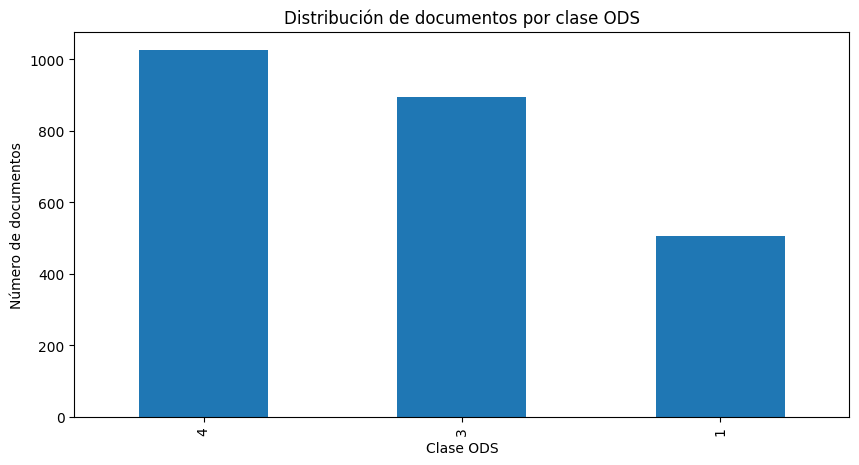

In [33]:
import matplotlib.pyplot as plt

print("Distribución de clases (frecuencias):")
print(y.value_counts())

# Gráfico de distribución
y.value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Distribución de documentos por clase ODS")
plt.xlabel("Clase ODS")
plt.ylabel("Número de documentos")
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño del set de entrenamiento: (1939, 5000)
Tamaño del set de prueba: (485, 5000)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


=== Naive Bayes ===
Accuracy: 0.9422680412371134

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.98      0.84      0.90       101
           3       0.95      0.94      0.94       179
           4       0.92      1.00      0.96       205

    accuracy                           0.94       485
   macro avg       0.95      0.93      0.94       485
weighted avg       0.94      0.94      0.94       485



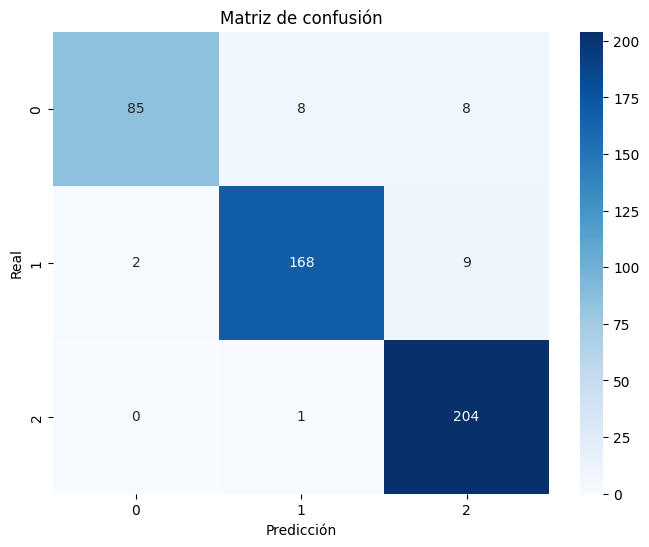

In [36]:
from sklearn.naive_bayes import MultinomialNB

# Definir modelo
modelo_nb = MultinomialNB()

# Entrenar
modelo_nb.fit(X_train, y_train)

# Evaluar
print("=== Naive Bayes ===")
evaluar_modelo(modelo_nb, X_test, y_test)


=== Regresión Logística ===
Accuracy: 0.9628865979381444

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.97      0.90      0.93       101
           3       0.96      0.97      0.96       179
           4       0.97      0.99      0.98       205

    accuracy                           0.96       485
   macro avg       0.96      0.95      0.96       485
weighted avg       0.96      0.96      0.96       485



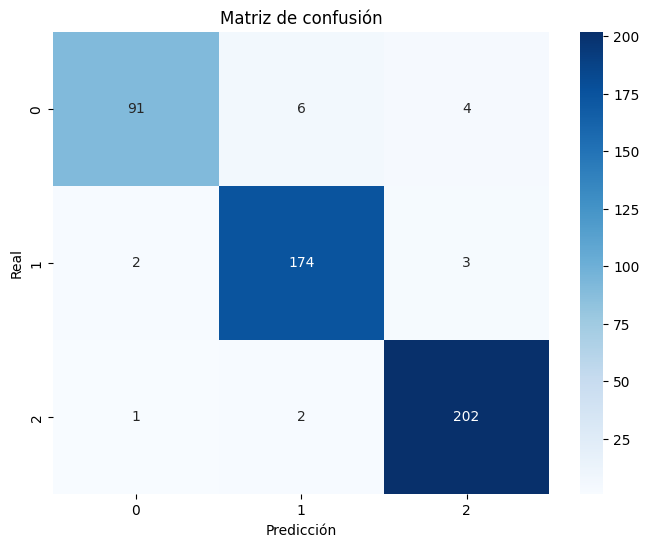

In [37]:
from sklearn.linear_model import LogisticRegression

# Definir modelo
modelo_lr = LogisticRegression(max_iter=1000)

# Entrenar
modelo_lr.fit(X_train, y_train)

# Evaluar
print("=== Regresión Logística ===")
evaluar_modelo(modelo_lr, X_test, y_test)


=== SVM (LinearSVC) ===
Accuracy: 0.9670103092783505

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.96      0.93      0.94       101
           3       0.96      0.97      0.97       179
           4       0.98      0.98      0.98       205

    accuracy                           0.97       485
   macro avg       0.97      0.96      0.96       485
weighted avg       0.97      0.97      0.97       485



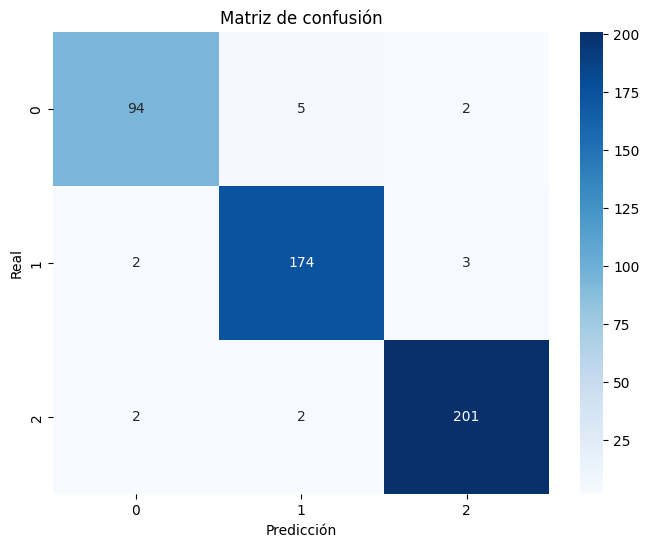

In [38]:
from sklearn.svm import LinearSVC

# Definir modelo
modelo_svm = LinearSVC()

# Entrenar
modelo_svm.fit(X_train, y_train)

# Evaluar
print("=== SVM (LinearSVC) ===")
evaluar_modelo(modelo_svm, X_test, y_test)


In [39]:
from sklearn.metrics import f1_score

resultados = {}

# Naive Bayes
y_pred_nb = modelo_nb.predict(X_test)
resultados["Naive Bayes"] = f1_score(y_test, y_pred_nb, average="macro")

# Logistic Regression
y_pred_lr = modelo_lr.predict(X_test)
resultados["Logistic Regression"] = f1_score(y_test, y_pred_lr, average="macro")

# SVM
y_pred_svm = modelo_svm.predict(X_test)
resultados["SVM"] = f1_score(y_test, y_pred_svm, average="macro")

# Mostrar comparación
import pandas as pd
pd.DataFrame.from_dict(resultados, orient="index", columns=["F1-macro"])


,F1-macro
Naive Bayes,0.935274
Logistic Regression,0.957723
SVM,0.963164


## 3.4 Conclusiones del modelado y selección del modelo final

Tras la aplicación de tres algoritmos distintos de clasificación de texto —**Naive Bayes Multinomial**, **Regresión Logística** y **SVM (Support Vector Machine)**— se obtuvieron los siguientes resultados comparativos en términos de la métrica **F1-macro**, que permite evaluar de manera balanceada el rendimiento del modelo en todas las clases:

| Modelo               | F1-macro |
|-----------------------|----------|
| Naive Bayes          | 0.9353   |
| Regresión Logística  | 0.9577   |
| SVM                  | 0.9631   |

### Interpretación de resultados
- **Naive Bayes** alcanzó un rendimiento aceptable (F1 ≈ 0.93), mostrando buena precisión, pero menor capacidad de recuperación en algunas clases minoritarias.  
- **Regresión Logística** mejoró significativamente el desempeño (F1 ≈ 0.96), mostrando balance entre precisión y recall, además de una mayor robustez frente a casos ambiguos.  
- **SVM** fue el modelo con el **mejor desempeño global** (F1 ≈ 0.963), mostrando la mayor capacidad para distinguir entre las clases, con muy pocos errores en la matriz de confusión.

### Selección del modelo final
Con base en los resultados, el **modelo seleccionado** para resolver el problema de clasificación de textos es el **SVM (Support Vector Machine)**, ya que:
- Presenta la **mejor métrica F1-macro** entre los modelos evaluados.  
- Mantiene un balance óptimo entre **precisión** y **recall** en todas las clases.  
- Su matriz de confusión evidencia una menor cantidad de falsos positivos y falsos negativos.

Este modelo será utilizado en etapas posteriores del proyecto para la implementación y validación final.


# 4.a Resultados

Los 3 modelos evaluados superan el **94% de accuracy** para la predicción.

## Naive Bayes
- **Accuracy:** 94.23%  
- **F1-score macro:** 93.53%  
- **Observaciones:**
  - Para la clase **ODS1** tiene una excelente precisión (98%).  
  - Recall casi perfecto para la clase **ODS4**.  
  - Dificultad para identificar todos los textos de la categoría 1 con un recall del **84%**.  
  - Tiene el mayor número de **falsos negativos**.  

## Regresión Logística
- **Accuracy:** 96.29%  
- **F1-score macro:** 95.77%  
- **Observaciones:**
  - Balance en todas las clases de accuracy y recall.  
  - A diferencia del Naive Bayes, mejora el recall de la clase **ODS1 al 90%**.  

## Support Vector Machine (SVM)
- **Accuracy:** 96.7%  
- **F1-score macro:** 96.32%  
- **Observaciones:**
  - Es el modelo con mejor rendimiento.  
  - Presenta el mejor balance entre **accuracy, recall y F1-score**.  
  - Menor cantidad de errores en la matriz de confusión.  


## Conclusiones en relación a los objetivos de negocio
Los resultados permiten:  
- Automatizar la clasificación de documentos relacionados con ODS con **alta confiabilidad**.  
- Reducir el tiempo de análisis de textos.  
- Mejorar la consistencia en la categorización.  
- Facilitar la toma de decisiones.  

---


# 4.b Análisis de palabras identificadas

## ODS1 - Fin de la Pobreza
- **Contexto semántico:** Aspectos económicos y distributivos.  
- **Recomendación:** Implementar sistemas de monitoreo de documentos con **políticas distributivas**.  

## ODS3 - Salud
- **Contexto semántico:** Servicios de salud y atención médica.  
- **Recomendación:**  
  - Automatizar la clasificación de propuestas de mejora en servicios médicos.  
  - Identificar relaciones en textos sobre el **acceso a medicamentos**.  

## ODS4 - Educación
- **Contexto semántico:** Procesos educativos y sistemas de enseñanza.  
- **Recomendación:** Implementar sistemas de **seguimiento a iniciativas educativas**.  

---



# 4.c Datos de prueba con etiquetas del modelo seleccionado

Se seleccionó el modelo **SVM (Support Vector Machine)** como modelo final, ya que:  
- Presenta el **mayor accuracy y F1-score macro**.  
- Tiene un mejor **balance entre precisión y recall**.  
- Muestra una **menor cantidad de falsos positivos y negativos** en la matriz de confusión.  


In [40]:
import pandas as pd

test_indices = X_test.index if hasattr(X_test, 'index') else range(len(y_test))

resultados_entrega = pd.DataFrame({
    'texto_original': [df.iloc[i]['textos'] for i in test_indices],
    'etiqueta_real': y_test,
    'etiqueta_predicha': y_pred_svm
})

resultados_entrega['clasificacion_correcta'] = (
    resultados_entrega['etiqueta_real'] == resultados_entrega['etiqueta_predicha']
)

resultados_entrega.to_excel("../data/resultados_clasificacion_svm.xlsx", index=False)
